In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pylab

import pandas as pd
import xgboost as xgb
import statsmodels.stats.api as sm

from sklearn import ensemble , cross_validation, learning_curve, metrics 
from sklearn.cross_validation import train_test_split

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
import math

from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
from IPython.parallel import Client

# The Client allows us to use the engines interactively.
# We simply pass Client the name of the cluster profile we
# are using.
c = Client(profile='myprofile')
v = c[:]

c.ids


/usr/local/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


[0, 1, 2, 3, 4, 5, 6, 7]

In [2]:
Train = pd.read_csv("train.csv", sep=',', header=0)
Train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


qqqq 371


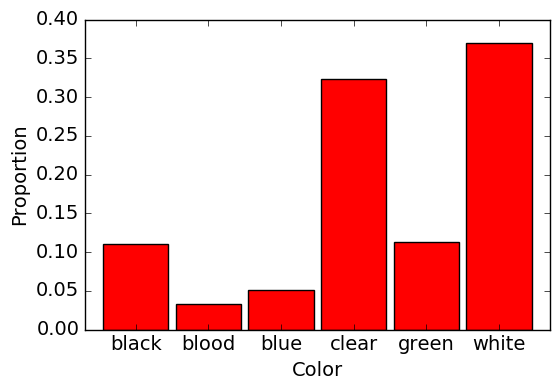

In [3]:
#plt.figure(figsize(8,6))
stat = Train.groupby('color')['color'].agg(lambda x : float(len(x))/Train.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Color', fontsize=14)
print ("qqqq {}".format(Train.shape[0]))


In [69]:

X_train, X_test, Y_train, Y_test = train_test_split(Train.iloc[:, Train.columns != 'type'], Train['type'], test_size=0.25, random_state=42)


In [52]:
# Estimate the score after imputation of the missing values
X_train_missing = X_train.copy()
#X_train_missing.loc[X_train_missing.color == 'blood','color'] = 'NaN'
#X_train_missing.loc[X_train_missing.color == 'blue','color'] = 'NaN'
Y_train_missing = Y_train.copy()

# Estimate the score after imputation of the missing values
X_test_missing = X_test.copy()
#X_test_missing.loc[X_test_missing.color == 'blood','color'] = 'NaN'
#X_test_missing.loc[X_test_missing.color == 'blue','color'] = 'NaN'
Y_test_missing = Y_test.copy()


In [8]:
X_train_missing.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color
321,756,0.187781,0.736491,0.344348,0.346306,clear
222,553,0.250293,0.408878,0.456618,0.466024,white
227,561,0.524138,0.578163,0.621787,0.689326,blue
141,333,0.384235,0.393451,0.353746,0.490884,white
17,31,0.585559,0.585939,1.000000,0.708692,black


In [53]:
#to convert into numbers

categorical_color = preprocessing.LabelEncoder()

X_train_missing.color = categorical_color.fit_transform(X_train_missing.color)
X_test_missing.color = categorical_color.fit_transform(X_test_missing.color)


In [10]:
X_train_missing.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color
321,756,0.187781,0.736491,0.344348,0.346306,3
222,553,0.250293,0.408878,0.456618,0.466024,5
227,561,0.524138,0.578163,0.621787,0.689326,2
141,333,0.384235,0.393451,0.353746,0.490884,5
17,31,0.585559,0.585939,1.000000,0.708692,0


In [88]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", RandomForestClassifier(random_state=42,
                                                       n_estimators=100, min_samples_split=5))])
score = cross_val_score(estimator, X_train_missing, Y_train_missing, scoring = 'accuracy', cv = 5)
print("Score after imputation of the missing values = {}".format(score.mean()))

Score after imputation of the missing values = 0.7304597701149425


In [89]:

model_IMPUTER = Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)

In [90]:
IMPUTER_train = model_IMPUTER.fit(X_train_missing,Y_train_missing)
IMPUTER_test = model_IMPUTER.fit(X_test_missing,Y_test_missing)

In [93]:
QQ_train = IMPUTER_train.fit_transform(X_train_missing).copy()
QQ_test = IMPUTER_test.fit_transform(X_test_missing).copy()
QQ_test[-5:-1]

array([[  2.08000000e+02,   6.19468011e-01,   4.65613726e-01,
          3.67913923e-01,   5.35857741e-01,   3.76119403e+00],
       [  4.82000000e+02,   3.67419376e-01,   5.75229060e-01,
          4.74941758e-01,   4.48401795e-01,   5.00000000e+00],
       [  7.39000000e+02,   4.44005602e-01,   4.24188994e-01,
          5.49613206e-01,   4.47517193e-01,   4.00000000e+00],
       [  7.01000000e+02,   4.76891624e-01,   4.78592354e-01,
          4.03630335e-01,   5.44586652e-01,   2.00000000e+00]])

In [54]:
#to convert into numbers

categorical_color = preprocessing.LabelEncoder()

X_train.color = categorical_color.fit_transform(X_train.color)

X_test.color = categorical_color.fit_transform(X_test.color)

In [17]:
X_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
321,756,0.187781,0.736491,0.344348,0.346306,3
222,553,0.250293,0.408878,0.456618,0.466024,5
227,561,0.524138,0.578163,0.621787,0.689326,2
141,333,0.384235,0.393451,0.353746,0.490884,5
17,31,0.585559,0.585939,1.000000,0.708692,0


# Random Forest

In [18]:
n_trees = list(range(1, 100, 2) )

In [70]:
X_train_fit = X_train.drop(X_train_missing.columns[[0,5]], axis=1)
X_test_fit = X_test.drop(X_test_missing.columns[[0,5]], axis=1)

In [71]:
X_train_fit.head()

,bone_length,rotting_flesh,hair_length,has_soul
321,0.187781,0.736491,0.344348,0.346306
222,0.250293,0.408878,0.456618,0.466024
227,0.524138,0.578163,0.621787,0.689326
141,0.384235,0.393451,0.353746,0.490884
17,0.585559,0.585939,1.000000,0.708692


In [72]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=42)
    score = cross_validation.cross_val_score(estimator, X_train_fit, Y_train, 
                                             scoring = 'accuracy', cv = 5)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 18 s, sys: 78.8 ms, total: 18.1 s
Wall time: 18.1 s


In [73]:
scoring[-5:].mean(axis=1)


matrix([[ 0.71603377],
        [ 0.70895357],
        [ 0.70187337],
        [ 0.69830194],
        [ 0.70181071]])

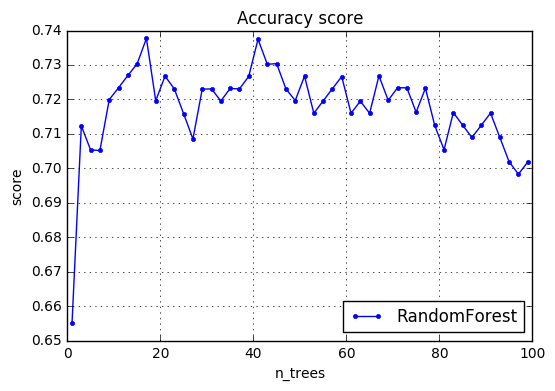

In [74]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [75]:
estimator = ensemble.RandomForestClassifier(n_estimators = 41, min_samples_split=5, random_state=42)

In [76]:
estimator.fit(X_train_fit, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=41, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

Feature ranking:
1. feature hair_length (0.356771)
2. feature has_soul (0.280091)
3. feature rotting_flesh (0.198777)
4. feature bone_length (0.164360)


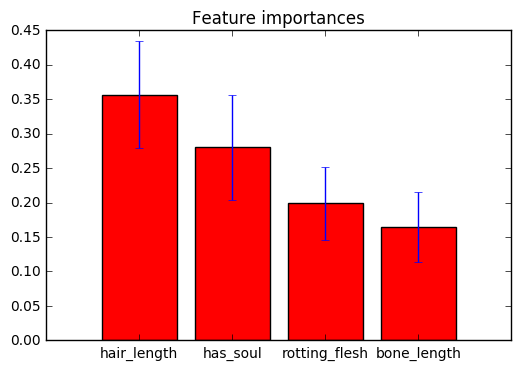

In [77]:
importances = estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_fit.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train_fit.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_fit.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_fit.shape[1]), X_train_fit.columns[indices])
plt.xlim([-1, X_train_fit.shape[1]])
plt.show()

In [35]:
importances

array([ 0.17951808,  0.21022955,  0.33800436,  0.24606508,  0.02618293])

In [36]:
importances[indices[0]]

0.33800435692393371

# XGB boosting

In [78]:
%%time
xgb_scoring = []

for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = cross_validation.cross_val_score(estimator, X_train_fit, Y_train, 
                                             scoring = 'accuracy', cv = 5)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 5.2 s, sys: 0 ns, total: 5.2 s
Wall time: 5.2 s


In [68]:
estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=79, min_child_weight=3)
xgb_scoring[-5:].mean(axis=1)


matrix([[ 0.70187565],
        [ 0.70544708],
        [ 0.71258993],
        [ 0.71258993],
        [ 0.70901851]])

In [ ]:
estimator.fit(X_train.loc[:, X_train.columns != 'id'], Y_train)

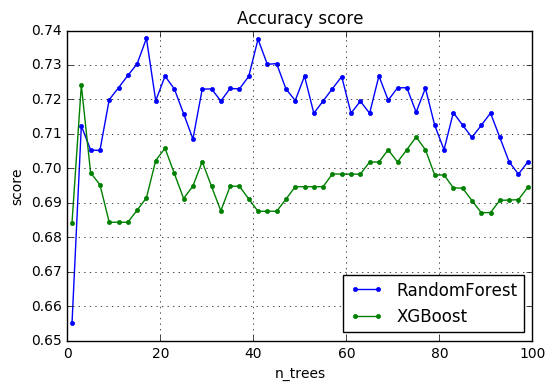

In [79]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [181]:
%%time

estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=13, min_child_weight=3)
score = cross_validation.cross_val_score(estimator, X_train, Y_train, 
                                             scoring = 'accuracy', cv = 5)    

CPU times: user 53.9 ms, sys: 0 ns, total: 53.9 ms
Wall time: 53.4 ms


In [182]:
score.mean()

0.75185349737981322

In [206]:
model_RF = ensemble.RandomForestClassifier(n_estimators = 45, min_samples_leaf=10)

In [207]:
model_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=45, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [208]:
prediction_RF = model_RF.predict(X_test)

In [209]:
prediction_RF

array(['Goblin', 'Ghost', 'Ghoul', 'Goblin', 'Ghost', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghost',
       'Ghost', 'Ghost', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin',
       'Ghoul', 'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Goblin',
       'Ghost', 'Ghost', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin', 'Goblin',
       'Ghost', 'Ghost', 'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Goblin',
       'Ghost', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Goblin',
       'Ghoul', 'Ghost', 'Goblin', 'Goblin', 'Goblin', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Ghost',
       'Goblin', 'Goblin', 'Goblin', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghoul', 'Ghoul'], dtype=object)

In [210]:
sum(prediction_RF == Y_test) / len(prediction_RF)

0.72043010752688175

In [47]:
Train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [190]:

#to convert back
X_train.color = categorical_color.inverse_transform(X_train.color)
X_test.color = categorical_color.inverse_transform(X_test.color)


In [106]:
pd.concat([X_test.iloc[0:,X_test.columns!="type"], pd.DataFrame(Y_test)], axis=1).head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
207,511,0.622124,0.585600,0.595529,0.556500,black,Goblin
82,185,0.516814,0.463708,0.321867,0.009402,green,Ghost
185,458,0.498438,0.653783,0.378707,0.708981,white,Goblin
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
65,142,0.609634,0.646037,0.243755,0.348240,black,Ghost


In [107]:
X_test.iloc[0:5,X_test.columns!="type"]

,id,bone_length,rotting_flesh,hair_length,has_soul,color
207,511,0.622124,0.585600,0.595529,0.556500,black
82,185,0.516814,0.463708,0.321867,0.009402,green
185,458,0.498438,0.653783,0.378707,0.708981,white
368,890,0.481640,0.501147,0.496446,0.544003,clear
65,142,0.609634,0.646037,0.243755,0.348240,black


In [ ]:
savetxt('submission_day6.csv', predicted_probs, delimiter=',', fmt='%f')

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [81]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "XGBoost",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1.0),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=13, min_child_weight=3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators = 45, min_samples_leaf=10),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [82]:
#X_train_fit = QQ_train.copy()
#X_test_fit = QQ_test.copy()
#X_train_fit = X_train_missing.copy()
#X_test_fit = X_test_missing.copy()
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_fit, Y_train)
    score = clf.score(X_test_fit, Y_test)
    print("Score of {} is {}".format(name, score))

Score of Nearest Neighbors is 0.6236559139784946
Score of Linear SVM is 0.6881720430107527
Score of RBF SVM is 0.6881720430107527
Score of Gaussian Process is 0.7204301075268817
Score of XGBoost is 0.7096774193548387
Score of Decision Tree is 0.6451612903225806
Score of Random Forest is 0.7096774193548387
Score of Neural Net is 0.7204301075268817
Score of AdaBoost is 0.6344086021505376
Score of Naive Bayes is 0.7311827956989247
Score of QDA is 0.7204301075268817


/usr/local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [59]:
X_train_fit = X_train.drop(X_train_missing.columns[[5]], axis=1)
X_test_fit = X_test.drop(X_test_missing.columns[[5]], axis=1)
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train_fit, Y_train)
    score = clf.score(X_test_fit, Y_test)
    print("Score of {} is {}".format(name, score))

Score of Nearest Neighbors is 0.3763440860215054
Score of Linear SVM is 0.6666666666666666
Score of RBF SVM is 0.27956989247311825
Score of Gaussian Process is 0.27956989247311825
Score of XGBoost is 0.7419354838709677
Score of Decision Tree is 0.6451612903225806
Score of Random Forest is 0.7419354838709677
Score of Neural Net is 0.27956989247311825
Score of AdaBoost is 0.6666666666666666
Score of Naive Bayes is 0.7096774193548387
Score of QDA is 0.7096774193548387


In [249]:
X_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
321,756,0.187781,0.736491,0.344348,0.346306,3
222,553,0.250293,0.408878,0.456618,0.466024,5
227,561,0.524138,0.578163,0.621787,0.689326,2
141,333,0.384235,0.393451,0.353746,0.490884,5
17,31,0.585559,0.585939,1.000000,0.708692,0



#PCA

In [85]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:


# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X_train, Y_train).transform(X_train)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X_train, Y_train)
print("qqq {} EEEE".format(grid_search.best_estimator_))

In [263]:
prediction = grid_search.best_estimator_.predict

In [267]:
sum(prediction == Y_train) / len(prediction)

0.70863309352517989

In [282]:
type(grid_search.best_estimator_.fit_transform)

method

In [ ]:
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)